# Continuous-time Markov model for kinesin stepping

The continuous-time Markov model  for kinesin stepping from Fig. 6a in Ref. [1] describes a molecular motor moving along a microtubule. It analyses the individual stepwise movements  of kinesin travelling along microtubules.

Description of the continuous-time Markov model

At state **K**, there is absence of ATP and hence  kinesin motor attach to the microtubule with one head, leaving the other one free. ATP molecules then bind to the head that is attached to the microtubule State **K.T** at a rate of $k_{1}$. At a transition rate of $k_{2}$, there is a nucleotide hydrolysis process from ATP to ADP, releasing a protein $P_{i}$ and leading to state **K.D**. Finally, at a transition rate of $k_{3f}$ or $k_{3b}$, the motor can either take a forward 8-nm step or detach and take a backward step respectively.

One numerical simulation of time duration 5s for both F=0 and F=3.8pN to show the evolution of the motor's state as a function of time and the associated time trace for the position of the motor showing only the forward and backward spatial steps of size L = 8nm.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Gillespie simulation function
def gillespie_simulation(k1, k2, k3f, k3b, total_time, L):
    state = "K"  # Initial state
    time = 0  # Start time
    times = [0]  # Record times
    states = [state]  # Record states
    position = [0]  # Record position

    while time < total_time:
        # Define transition rates based on current state
        if state == "K":
            rates = [k1]
        elif state == "K.T":
            rates = [k2]
        elif state == "K.D":
            rates = [k3f, k3b]

        # Total rate and time until the next event
        total_rate = sum(rates)
        if total_rate == 0:
            break

        dt = np.random.exponential(1 / total_rate) # Total rate for individual state.
        time += dt

        # Determine the event
        r = np.random.rand() * total_rate # Random number between 0 and total_rate
        cumulative_rate = 0
        for i, rate in enumerate(rates):
            cumulative_rate += rate
            if r < cumulative_rate:
                event = i # event will be 0 for backward (k3b) or 1 for forward (k3f)
                break

        # Update state and position based on the event
        if state == "K" and event == 0:
            state = "K.T"
        elif state == "K.T" and event == 0:
            state = "K.D"
        elif state == "K.D":
            if event == 0:
                state = "K"
                position.append(position[-1] + L)  # Forward step
            elif event == 1:
                state = "K"
                position.append(position[-1] - L)  # Backward step

        # Record the state and time
        times.append(time)
        states.append(state)

        # Fill in position with initial position if no step occurred
        if len(position) < len(times):
            position.append(position[-1])

    return np.array(times), np.array(states), np.array(position)

In [3]:
# Parameters for the simulation
L = 8  # step size in nm
total_time = 5  # total simulation time in seconds

# Saturated concentration
k1_F0, k2_F0, k3f_F0, k3b_F0 = 3400, 140, 770, 3.5  # Transition rates for F = 0
k1_F38, k2_F38, k3f_F38, k3b_F38 = 1400, 140, 47, 3.1  # Transition rates for F = 3.8 pN

# Limiting concentration
#k1_F0, k2_F0, k3f_F0, k3b_F0 = 34, 140, 770, 3.5  # Transition rates for F = 0
#k1_F38, k2_F38, k3f_F38, k3b_F38 = 14, 140, 47, 3.1  # Transition rates for F = 3.8 pN

# Simulate for F = 0
times_F0, states_F0, position_F0 = gillespie_simulation(k1_F0, k2_F0, k3f_F0, k3b_F0, total_time, L)

# Simulate for F = 3.8 pN
times_F38, states_F38, position_F38 = gillespie_simulation(k1_F38, k2_F38, k3f_F38, k3b_F38, total_time, L)

# F = 0 (at saturating concentration)

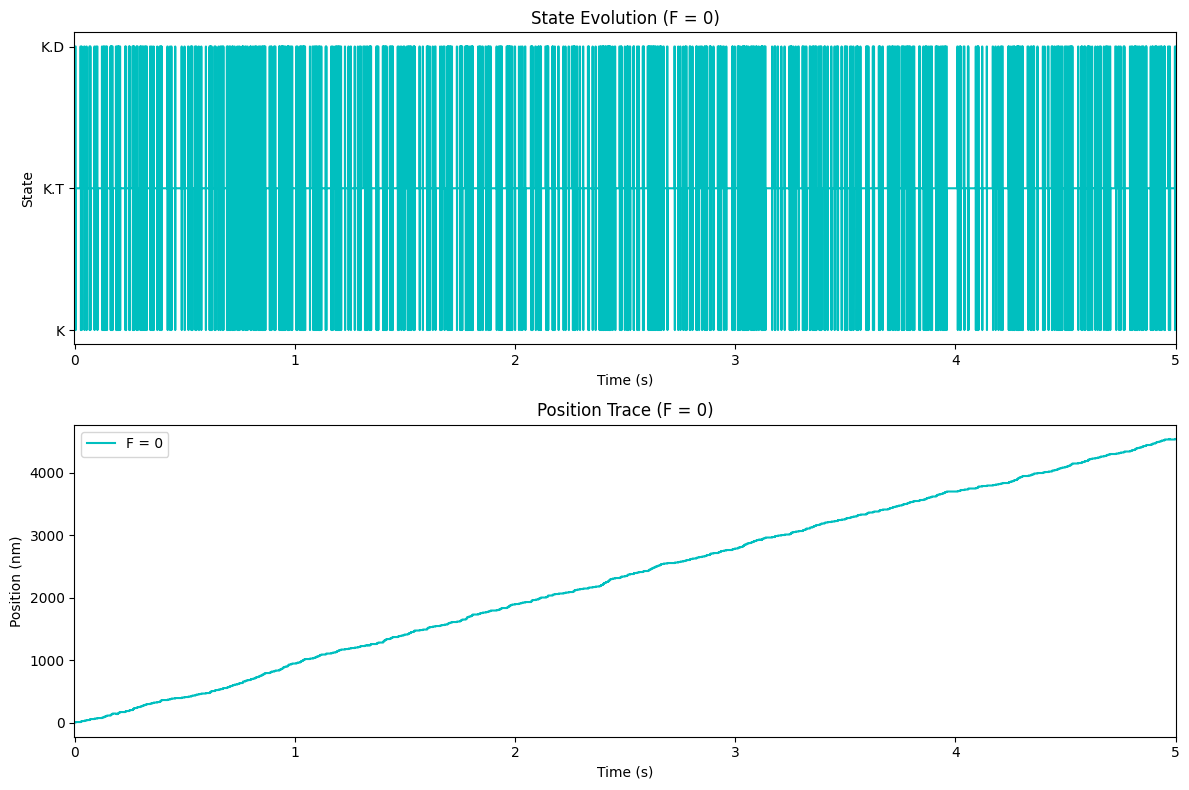

In [4]:
# Plotting results for F = 0
fig, axes = plt.subplots(2, 1, figsize=(12, 8))

# State evolution
axes[0].plot(times_F0, states_F0,'c', drawstyle='steps-post', label='F = 0')
axes[0].set_title('State Evolution (F = 0)')
axes[0].set_xlabel('Time (s)')
axes[0].set_ylabel('State')
axes[0].set_xlim(-0.001, total_time)

# Position trace
axes[1].plot(times_F0, position_F0,'c', drawstyle='steps-post', label='F = 0')
axes[1].set_title('Position Trace (F = 0)')
axes[1].set_xlabel('Time (s)')
axes[1].set_ylabel('Position (nm)')
axes[1].set_xlim(-0.001, total_time)

plt.tight_layout()
plt.legend()
plt.show()

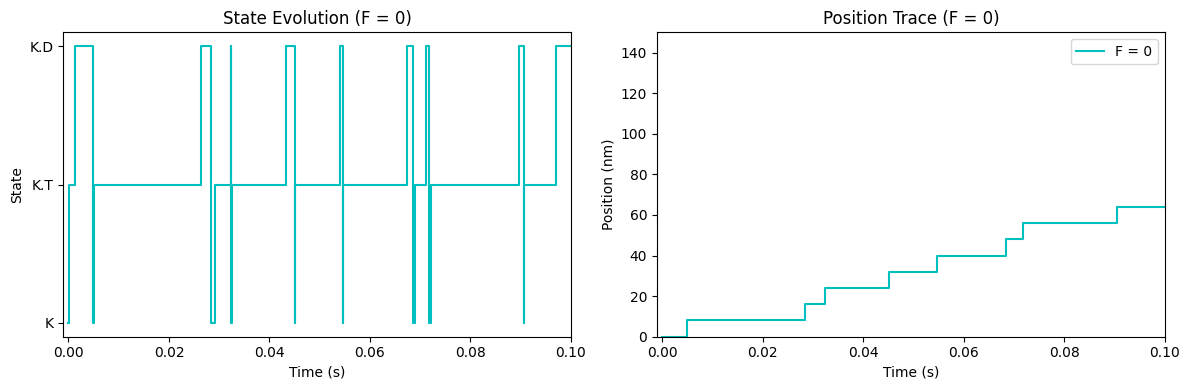

In [5]:
# Plotting results for F = 0
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# State evolution
axes[0].plot(times_F0, states_F0,'c', drawstyle='steps-post', label='F = 0')
axes[0].set_title('State Evolution (F = 0)')
axes[0].set_xlabel('Time (s)')
axes[0].set_ylabel('State')
axes[0].set_xlim(-0.001, 0.1)

# Position trace
axes[1].plot(times_F0, position_F0,'c', drawstyle='steps-post', label='F = 0')
axes[1].set_title('Position Trace (F = 0)')
axes[1].set_xlabel('Time (s)')
axes[1].set_ylabel('Position (nm)')
axes[1].set_xlim(-0.001, 0.1)
axes[1].set_ylim(0, 150)

plt.tight_layout()
plt.legend()
plt.show()

# F = 3.8pN (at saturating concentration)

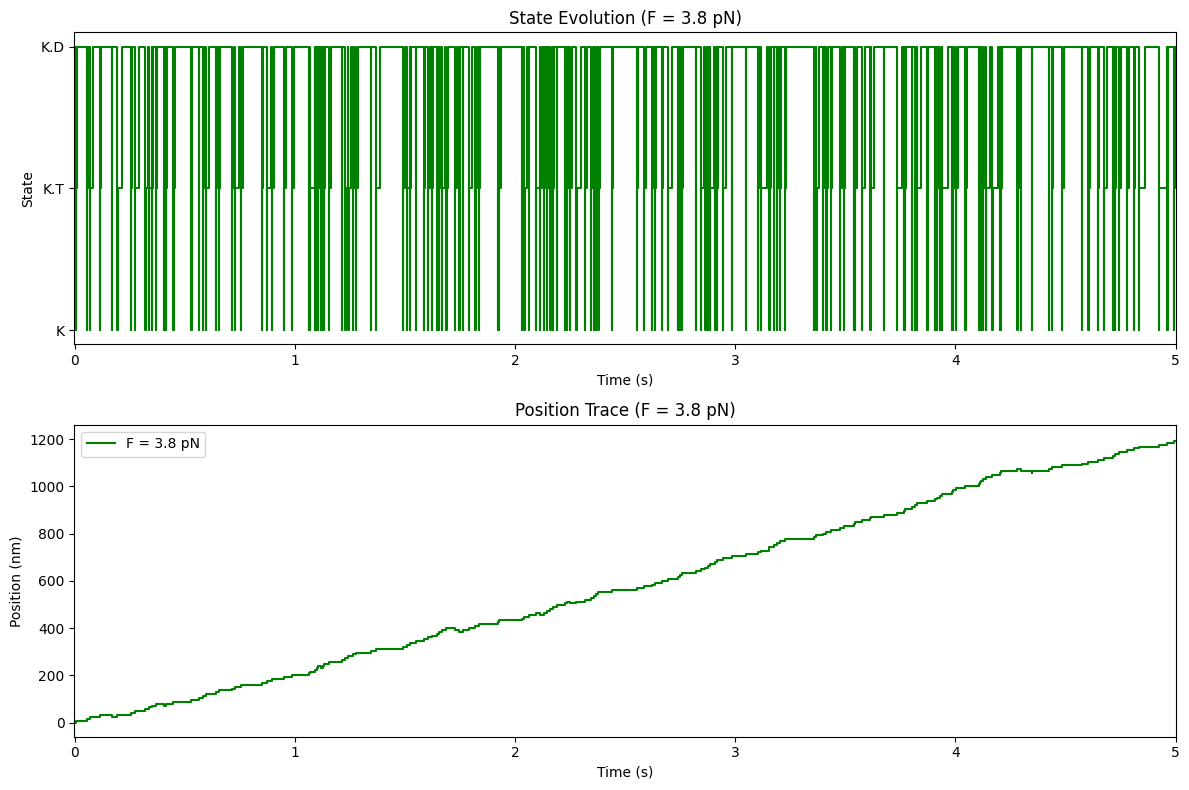

In [6]:
# Plotting results for F = 3.8 pN
fig, axes = plt.subplots(2, 1, figsize=(12, 8))

# State evolution
axes[0].plot(times_F38, states_F38,'g', drawstyle='steps-post', label='F = 3.8 pN')  # Use descriptive states directly
axes[0].set_title('State Evolution (F = 3.8 pN)')
axes[0].set_xlabel('Time (s)')
axes[0].set_ylabel('State')
axes[0].set_xlim(-0.001, total_time)

# Position trace
axes[1].plot(times_F38, position_F38,'g', drawstyle='steps-post', label='F = 3.8 pN')
axes[1].set_title('Position Trace (F = 3.8 pN)')
axes[1].set_xlabel('Time (s)')
axes[1].set_ylabel('Position (nm)')
axes[1].set_xlim(-0.001, total_time)

plt.tight_layout()
plt.legend()
plt.show()

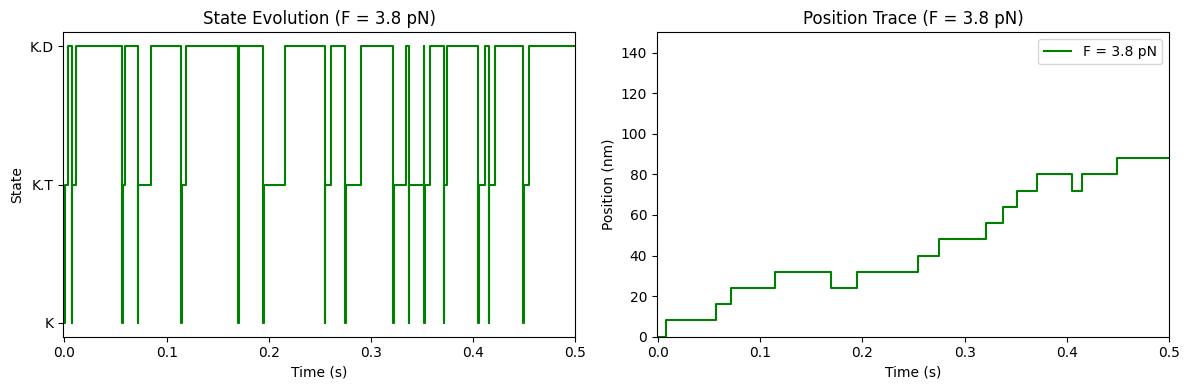

In [7]:
# Plotting results for F = 3.8 pN
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# State evolution
axes[0].plot(times_F38, states_F38,'g', drawstyle='steps-post', label='F = 3.8 pN')  # Use descriptive states directly
axes[0].set_title('State Evolution (F = 3.8 pN)')
axes[0].set_xlabel('Time (s)')
axes[0].set_ylabel('State')
axes[0].set_xlim(-0.001, 0.5)

# Position trace
axes[1].plot(times_F38, position_F38,'g', drawstyle='steps-post', label='F = 3.8 pN')
axes[1].set_title('Position Trace (F = 3.8 pN)')
axes[1].set_xlabel('Time (s)')
axes[1].set_ylabel('Position (nm)')
axes[1].set_xlim(-0.001, 0.5)
axes[1].set_ylim(0, 150)

plt.tight_layout()
plt.legend()
plt.show()

#Multiple simulations for a given force condition

In [8]:
#Multiple simulations for a given force condition
def multi_simulations(k1, k2, k3f, k3b, total_time, L, num_simulations):
    velocities = []  #store velocities (nm/s)
    atp_hydrolysis_rates = []  #store ATP hydrolysis rates (1/s)

    for _ in range(num_simulations):
        # Run a Gillespie simulation
        times, states, positions = gillespie_simulation(k1, k2, k3f, k3b, total_time, L)

        # Compute velocity (total displacement / total time)
        displacement = positions[-1] - positions[0]  # Total displacement
        velocity = displacement / total_time
        velocities.append(velocity)

        # Compute ATP hydrolysis rate (number of transitions KT -> KD per second)
        atp_hydrolysis = sum(1 for i in range(len(states) - 1) if states[i] == "K.T" and states[i + 1] == "K.D")
        atp_hydrolysis_rate = atp_hydrolysis / total_time
        atp_hydrolysis_rates.append(atp_hydrolysis_rate)

    return np.mean(velocities), np.mean(atp_hydrolysis_rates)

In [9]:
# Number of simulations
num_simulations = 1000

# Compute metrics for F = 0
mean_velocity_F0, mean_atp_rate_F0 = multi_simulations(
    k1_F0, k2_F0, k3f_F0, k3b_F0, total_time, L, num_simulations
)

# Compute metrics for F = 3.8 pN
mean_velocity_F38, mean_atp_rate_F38 = multi_simulations(
    k1_F38, k2_F38, k3f_F38, k3b_F38, total_time, L, num_simulations
)

# Print results
print(f"F = 0 pN: Mean velocity = {mean_velocity_F0:.2f} nm/s, Mean ATP hydrolysis rate = {mean_atp_rate_F0:.2f} 1/s")
print(f"F = 3.8 pN: Mean velocity = {mean_velocity_F38:.2f} nm/s, Mean ATP hydrolysis rate = {mean_atp_rate_F38:.2f} 1/s")

F = 0 pN: Mean velocity = 907.84 nm/s, Mean ATP hydrolysis rate = 114.66 1/s
F = 3.8 pN: Mean velocity = 253.70 nm/s, Mean ATP hydrolysis rate = 36.20 1/s


# Waiting time distribution

The analytical distribution is given as:

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for F = 0
k3f_F0 = 770
k3b_F0 = 3.5
lambda_KD_F0 = k3f_F0 + k3b_F0

# Parameters for F = 3.8
k3f_F38 = 47
k3b_F38 = 3.1
lambda_KD_F38 = k3f_F38 + k3b_F38

# Generate analytical distribution F = 0.
t_values_F0 = np.linspace(0, 0.01, 100)
f_KD_F0 = lambda_KD_F0 * np.exp(-lambda_KD_F0 * t_values_F0)

# Generate analytical distribution F = 3.8pN.
t_values_F38 = np.linspace(0, 0.15, 100)
f_KD_F38 = lambda_KD_F38 * np.exp(-lambda_KD_F38 * t_values_F38)

And the emperical waiting times can be extracted with the function:

In [11]:

def extract_waiting_times(times, states, target_state):
    waiting_times = []
    in_target_state = False
    start_time = 0

    for i in range(len(states)):
        if states[i] == target_state:
            if not in_target_state:
                # Entering the target state
                start_time = times[i]
                in_target_state = True
        else:
            if in_target_state:
                # Exiting the target state
                waiting_time = times[i] - start_time
                waiting_times.append(waiting_time)
                in_target_state = False

    return waiting_times

Waiting time distribution in state K.D for F = 0.

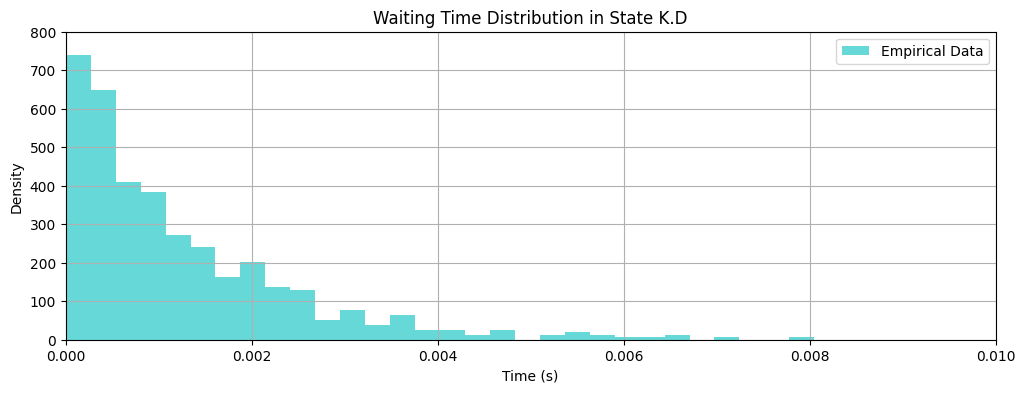

In [12]:
# Extract waiting times for K.D in F = 0 simulation
waiting_times_KD_F0 = extract_waiting_times(times_F0, states_F0, target_state="K.D")

#Plot the analytical distribution
plt.figure(figsize=(12, 4))
# Plot histogram of empirical data
plt.hist(waiting_times_KD_F0, bins=30, density=True, alpha=0.6, color='c', label='Empirical Data')
plt.title('Waiting Time Distribution in State K.D')
plt.xlabel('Time (s)')
plt.ylabel('Density')
plt.xlim(0,0.01)
plt.ylim(0,800)
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

Mean waiting time in K.D (F = 0): 0.0012 s


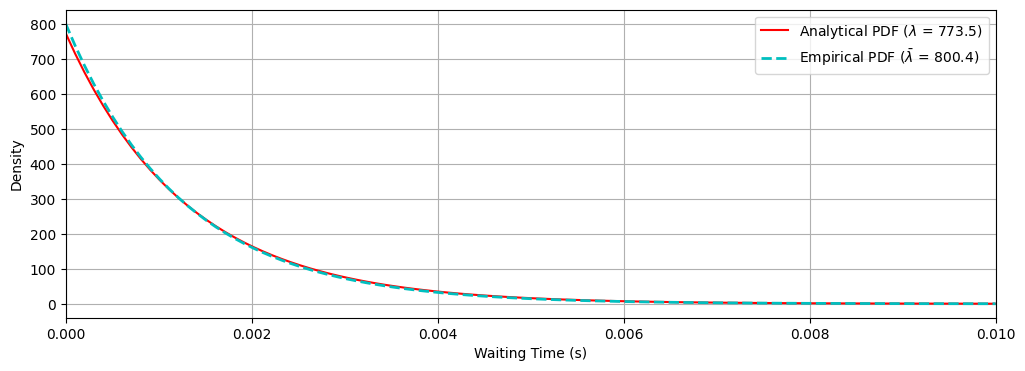

In [13]:
# Compute empirical mean
mean_waiting_time_F0 = np.mean(waiting_times_KD_F0)
print(f"Mean waiting time in K.D (F = 0): {mean_waiting_time_F0:.4f} s")

# Fit an exponential distribution to the empirical mean
from scipy.stats import expon
emperical_F0 = (1 / mean_waiting_time_F0) * np.exp(- t_values_F0 / mean_waiting_time_F0)

#Plot the analytical distribution
plt.figure(figsize=(12, 4))
plt.plot(t_values_F0, f_KD_F0, 'r-', label=f'Analytical PDF ($\lambda$ = {lambda_KD_F0:.1f})')

# Plot the fitted exponential PDF for Empirical
plt.plot(t_values_F0, emperical_F0, 'c', linewidth=2, label=f'Empirical PDF ($\\bar{{\\lambda}}$ = {1/mean_waiting_time_F0:.1f})',linestyle='dashed')
plt.xlabel('Waiting Time (s)')
plt.ylabel('Density')
plt.xlim(0, 0.01)
plt.grid(True)

plt.legend()
plt.show()

Waiting time distribution in state K.D for F = 3.8pN.

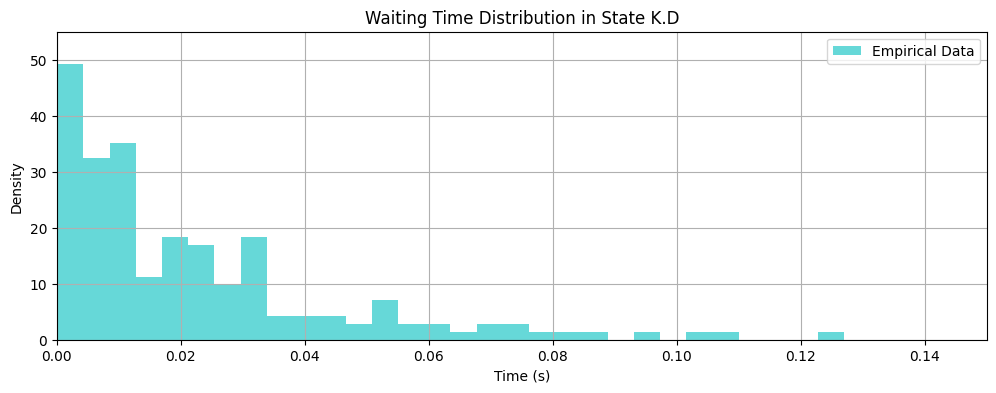

In [14]:
# Extract waiting times for K.D in F = 3.8pN simulation
waiting_times_KD_F38 = extract_waiting_times(times_F38, states_F38, target_state="K.D")

#Plot the analytical distribution
plt.figure(figsize=(12, 4))
# Plot histogram of empirical data
plt.hist(waiting_times_KD_F38, bins=30, density=True, alpha=0.6, color='c', label='Empirical Data')
plt.title('Waiting Time Distribution in State K.D')
plt.xlabel('Time (s)')
plt.ylabel('Density')
plt.xlim(0,0.15)
plt.ylim(0,55)
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

Mean waiting time in K.D (F = 38): 0.0220 s


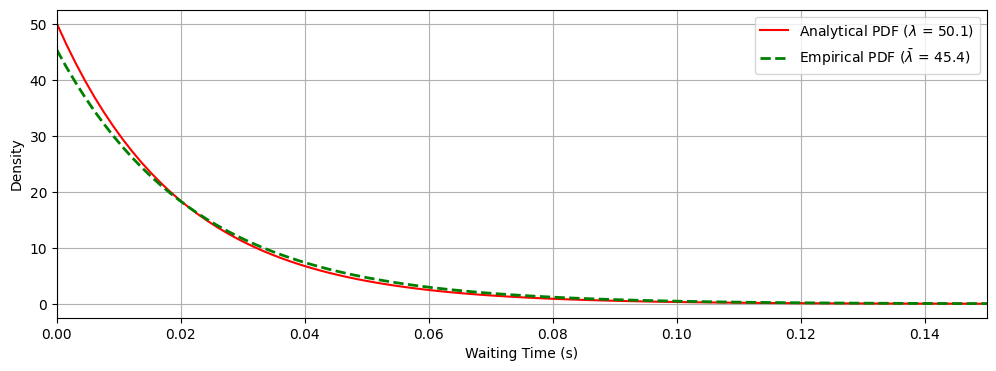

In [15]:
# Compute empirical mean
mean_waiting_time_F38 = np.mean(waiting_times_KD_F38)
print(f"Mean waiting time in K.D (F = 38): {mean_waiting_time_F38:.4f} s")

# Fit an exponential distribution to the empirical mean
from scipy.stats import expon
emperical_F38 = (1 / mean_waiting_time_F38) * np.exp(- t_values_F38 / mean_waiting_time_F38)

#Plot the analytical distribution
plt.figure(figsize=(12, 4))
plt.plot(t_values_F38, f_KD_F38, 'r-', label=f'Analytical PDF ($\lambda$ = {lambda_KD_F38:.1f})')

# Plot the fitted exponential PDF for Empirical
plt.plot(t_values_F38, emperical_F38, 'g', linewidth=2, label=f'Empirical PDF ($\\bar{{\\lambda}}$ = {1/mean_waiting_time_F38:.1f})',linestyle='dashed')
plt.xlabel('Waiting Time (s)')
plt.ylabel('Density')
plt.xlim(0, 0.15)
plt.grid(True)

plt.legend()
plt.show()

## References
[1] Masayoshi Nishiyama, Hideo Higuchi, and Toshio Yanagida. Chemomechanical coupling of the forward and backward steps of single kinesin molecules. Nature Cell Biology, 4(10):790797, 2002.